In [12]:
import pandas as pd
import json
import ast
import requests as req
import numpy as np
from matplotlib import pyplot as plt
url = "http://www.omdbapi.com/?t="
api_key = "&apikey=40e9cece"

In [2]:
movie_df = pd.read_csv("movies_metadata.csv", low_memory=False)
movie_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,FALSE,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,12/15/1995,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,FALSE,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,12/15/1995,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,FALSE,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,12/22/1995,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,FALSE,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,12/22/1995,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,FALSE,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,11/16/1995,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [3]:
shorter_movie_df=movie_df[["belongs_to_collection","budget","genres","id","imdb_id","original_language","overview","release_date","revenue","title","vote_average","vote_count"]]

In [4]:
shorter_movie_df=shorter_movie_df.loc[shorter_movie_df["original_language"]=="en"]
english_movie_df=shorter_movie_df[["title","budget","revenue","release_date","genres","imdb_id","id","vote_average",
                                "vote_count","overview","belongs_to_collection"]]
english_movie_df.head()

,title,budget,revenue,release_date,genres,imdb_id,id,vote_average,vote_count,overview,belongs_to_collection
0,Toy Story,30000000,373554033.0,10/30/1995,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,862,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ...","{'id': 10194, 'name': 'Toy Story Collection', ..."
1,Jumanji,65000000,262797249.0,12/15/1995,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,8844,6.9,2413.0,When siblings Judy and Peter discover an encha...,NaN
2,Grumpier Old Men,0,0.0,12/22/1995,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",tt0113228,15602,6.5,92.0,A family wedding reignites the ancient feud be...,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
3,Waiting to Exhale,16000000,81452156.0,12/22/1995,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,31357,6.1,34.0,"Cheated on, mistreated and stepped on, the wom...",NaN
4,Father of the Bride Part II,0,76578911.0,2/10/1995,"[{'id': 35, 'name': 'Comedy'}]",tt0113041,11862,5.7,173.0,Just when George Banks has recovered from his ...,"{'id': 96871, 'name': 'Father of the Bride Col..."


In [5]:
print(english_movie_df["belongs_to_collection"][1])

nan


In [6]:
means_to_plot_list=[]
no_collection_df=english_movie_df[pd.isnull(english_movie_df.belongs_to_collection)]
no_collection_mean=no_collection_df["revenue"].mean()
means_to_plot_list.append(no_collection_mean)

In [7]:
yes_collection_df=english_movie_df[pd.notnull(english_movie_df.belongs_to_collection)]
yes_collection_mean=yes_collection_df["revenue"].mean()
means_to_plot_list.append(yes_collection_mean)
#something=yes_collection_df['belongs_to_collection'].apply(lambda x:eval(x)[:]['name'])
#merge_df[‘genres’]= merge_df[‘genres’].apply(lambda x:eval(x)[0][‘name’])   #read up
yes_collection_df["belongs_to_collection"]=yes_collection_df['belongs_to_collection'].fillna("[{'name':""}]")
#merge_df[‘genres’]= merge_df[‘genres’].fillna(“[{‘name’:‘’}]“)
#yes_collection_df.belongs_to_collection[5][:10]
yes_collection_df.belongs_to_collection=yes_collection_df.belongs_to_collection.to_json()
yes_collection_df.head()

/Users/julie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/julie/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,title,budget,revenue,release_date,genres,imdb_id,id,vote_average,vote_count,overview,belongs_to_collection
0,Toy Story,30000000,373554033.0,10/30/1995,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,862,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ...","{""0"":""{'id': 10194, 'name': 'Toy Story Collect..."
2,Grumpier Old Men,0,0.0,12/22/1995,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",tt0113228,15602,6.5,92.0,A family wedding reignites the ancient feud be...,"{""0"":""{'id': 10194, 'name': 'Toy Story Collect..."
4,Father of the Bride Part II,0,76578911.0,2/10/1995,"[{'id': 35, 'name': 'Comedy'}]",tt0113041,11862,5.7,173.0,Just when George Banks has recovered from his ...,"{""0"":""{'id': 10194, 'name': 'Toy Story Collect..."
9,GoldenEye,58000000,352194034.0,11/16/1995,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",tt0113189,710,6.6,1194.0,James Bond must unmask the mysterious head of ...,"{""0"":""{'id': 10194, 'name': 'Toy Story Collect..."
12,Balto,0,11348324.0,12/22/1995,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",tt0112453,21032,7.1,423.0,An outcast half-wolf risks his life to prevent...,"{""0"":""{'id': 10194, 'name': 'Toy Story Collect..."


In [8]:
yes_collection_df.belongs_to_collection[0]

'{"0":"{\'id\': 10194, \'name\': \'Toy Story Collection\', \'poster_path\': \'\\/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg\', \'backdrop_path\': \'\\/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg\'}","2":"{\'id\': 119050, \'name\': \'Grumpy Old Men Collection\', \'poster_path\': \'\\/nLvUdqgPgm3F85NMCii9gVFUcet.jpg\', \'backdrop_path\': \'\\/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg\'}","4":"{\'id\': 96871, \'name\': \'Father of the Bride Collection\', \'poster_path\': \'\\/nts4iOmNnq7GNicycMJ9pSAn204.jpg\', \'backdrop_path\': \'\\/7qwE57OVZmMJChBpLEbJEmzUydk.jpg\'}","9":"{\'id\': 645, \'name\': \'James Bond Collection\', \'poster_path\': \'\\/HORpg5CSkmeQlAolx3bKMrKgfi.jpg\', \'backdrop_path\': \'\\/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg\'}","12":"{\'id\': 117693, \'name\': \'Balto Collection\', \'poster_path\': \'\\/w0ZgH6Lgxt2bQYnf1ss74UvYftm.jpg\', \'backdrop_path\': \'\\/9VM5LiJV0bGb1st1KyHA3cVnO2G.jpg\'}","18":"{\'id\': 3167, \'name\': \'Ace Ventura Collection\', \'poster_path\': \'\\/qCxH543pScFed1CycwJ1nVgrkOc.jpg\', 

In [ ]:
yes_collection_df

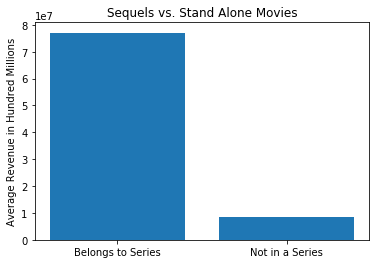

In [13]:
types_to_plot_list=["Not in a Series","Belongs to Series"]
plt.bar(types_to_plot_list, means_to_plot_list)
plt.title("Sequels vs. Stand Alone Movies")
plt.ylabel("Average Revenue in Hundred Millions")
plt.savefig("do_sequels_do_better.png")
plt.show()

In [51]:
x = movie_df.get_value(0,'genres')

#If we care about the IMBD ratings we could pull from the OMdb api using the imdb_id given in this dataset
#x = x.split(" ")
y = ast.literal_eval(x)
len(y)
for i in range(len(y)):
    print(y[i]['name'])
#z = json.loads(y)

Animation
Comedy
Family


In [136]:
#Finding the most popular genres
#Making a dataframe for each genre
#Removing movies that have no revenue (i.e revenue = 0.0)
Action_df = english_movie_df.loc[english_movie_df["genres"].str.contains("Action"),:]
Action_df = Action_df.loc[Action_df['revenue']!=0.0]

Adventure_df = english_movie_df.loc[english_movie_df["genres"].str.contains("Adventure"),:]
Adventure_df = Adventure_df.loc[Adventure_df['revenue']!=0.0]

Animation_df = english_movie_df.loc[english_movie_df["genres"].str.contains("Animation"),:]
Animation_df = Animation_df.loc[Animation_df['revenue']!=0.0]

Comedy_df = english_movie_df.loc[english_movie_df["genres"].str.contains("Comedy"),:]
Comedy_df = Comedy_df.loc[Comedy_df['revenue']!=0.0]

Documentary_df = english_movie_df.loc[english_movie_df["genres"].str.contains("Documentary"),:]
Documentary_df = Documentary_df.loc[Documentary_df['revenue']!=0.0]

Drama_df = english_movie_df.loc[english_movie_df["genres"].str.contains("Drama"),:]
Drama_df = Drama_df.loc[Drama_df['revenue']!=0.0]

Family_df = english_movie_df.loc[english_movie_df["genres"].str.contains("Family"),:]
Family_df = Family_df.loc[Family_df['revenue']!=0.0]

Fantasy_df = english_movie_df.loc[english_movie_df["genres"].str.contains("Fantasy"),:]
Fantasy_df = Fantasy_df.loc[Fantasy_df['revenue']!=0.0]

Horror_df = english_movie_df.loc[english_movie_df["genres"].str.contains("Horror"),:]
Horror_df = Horror_df.loc[Horror_df['revenue']!=0.0]

Mystery_df = english_movie_df.loc[english_movie_df["genres"].str.contains("Mystery"),:]
Mystery_df = Mystery_df.loc[Mystery_df['revenue']!=0.0]

Romance_df = english_movie_df.loc[english_movie_df["genres"].str.contains("Romance"),:]
Romance_df = Romance_df.loc[Romance_df['revenue']!=0.0]

Science_fiction_df = english_movie_df.loc[english_movie_df["genres"].str.contains("Science Fiction"),:]
Science_fiction_df = Science_fiction_df.loc[Science_fiction_df['revenue']!=0.0]

In [137]:
#Resetting the indexs
Action_df = Action_df.reset_index(drop=True)
Adventure_df = Adventure_df.reset_index(drop=True)
Animation_df = Animation_df.reset_index(drop=True)
Comedy_df = Comedy_df.reset_index(drop=True)
Documentary_df = Documentary_df.reset_index(drop=True)
Drama_df = Drama_df.reset_index(drop=True)
Family_df = Family_df.reset_index(drop=True)
Fantasy_df = Fantasy_df.reset_index(drop=True)
Horror_df = Horror_df.reset_index(drop=True)
Mystery_df = Mystery_df.reset_index(drop=True)
Romance_df = Romance_df.reset_index(drop=True)
Science_fiction_df = Science_fiction_df.reset_index(drop=True)


In [104]:
All_Genres = [Action_df, Adventure_df,Animation_df,Comedy_df,Documentary_df,Drama_df,Family_df,Fantasy_df,Horror_df,
              Mystery_df,Romance_df,Science_fiction_df]

In [188]:
top_movie_list=[]

In [193]:
#Now we want to add the imbd rating
#Working with Animation movies since its small
#Run this at home for all movies
#url = "http://www.theimdbapi.org/api/movie?movie_id="
rating = []
rating_count = []
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=40e9cece"
#print(Animation_df['imdb_id'].head(20))
counter = 0
for i in Animation_df['imdb_id']:
    try:
        #response = req.get(url + i + api_key)
        url_val = url + i + api_key
        print(url_val)
        response = req.get(url_val)
        response = response.json()
        response = (response['imdbRating'],
                  response['imdbVotes'])
        rating.append(response[0])
        rating_count.append(response[1])
        sleep = 1
        counter +=1
    except:
        print("Sorry, there was an error for %s" % i)
        rating.append(0)
        rating_count.append(0)
        sleep = 1
        counter +=1
Animation_df['IMDB_Rating'] = rating
Animation_df['IMDB_Voting_Count'] = rating_count

http://www.omdbapi.com/?i=tt0114709&apikey=40e9cece
http://www.omdbapi.com/?i=tt0112453&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114148&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113198&apikey=40e9cece
http://www.omdbapi.com/?i=tt0111333&apikey=40e9cece
http://www.omdbapi.com/?i=tt0110357&apikey=40e9cece
http://www.omdbapi.com/?i=tt0107688&apikey=40e9cece
http://www.omdbapi.com/?i=tt0110763&apikey=40e9cece
http://www.omdbapi.com/?i=tt0103639&apikey=40e9cece
http://www.omdbapi.com/?i=tt0029583&apikey=40e9cece
http://www.omdbapi.com/?i=tt0101414&apikey=40e9cece
http://www.omdbapi.com/?i=tt0032910&apikey=40e9cece
http://www.omdbapi.com/?i=tt0065421&apikey=40e9cece
http://www.omdbapi.com/?i=tt0115509&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116683&apikey=40e9cece
http://www.omdbapi.com/?i=tt0117705&apikey=40e9cece
http://www.omdbapi.com/?i=tt0095776&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116583&apikey=40e9cece
http://www.omdbapi.com/?i=tt0042332&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0420238&apikey=40e9cece
http://www.omdbapi.com/?i=tt0327597&apikey=40e9cece
http://www.omdbapi.com/?i=tt0102802&apikey=40e9cece
http://www.omdbapi.com/?i=tt0892782&apikey=40e9cece
http://www.omdbapi.com/?i=tt1049413&apikey=40e9cece
http://www.omdbapi.com/?i=tt1080016&apikey=40e9cece
http://www.omdbapi.com/?i=tt0472033&apikey=40e9cece
http://www.omdbapi.com/?i=tt0844471&apikey=40e9cece
http://www.omdbapi.com/?i=tt0858486&apikey=40e9cece
http://www.omdbapi.com/?i=tt0978762&apikey=40e9cece
http://www.omdbapi.com/?i=tt0375568&apikey=40e9cece
http://www.omdbapi.com/?i=tt0432283&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114108&apikey=40e9cece
http://www.omdbapi.com/?i=tt1067106&apikey=40e9cece
http://www.omdbapi.com/?i=tt0762125&apikey=40e9cece
http://www.omdbapi.com/?i=tt0780521&apikey=40e9cece
http://www.omdbapi.com/?i=tt1231580&apikey=40e9cece
http://www.omdbapi.com/?i=tt0892769&apikey=40e9cece
http://www.omdbapi.com/?i=tt1480660&apikey=40e9cece
http://www.o

In [194]:
Animation_df

,title,budget,revenue,release_date,genres,imdb_id,id,vote_average,vote_count,overview,belongs_to_collection,IMDB_Rating,IMDB_Voting_Count
0,Toy Story,30000000,3.735540e+08,10/30/1995,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,862,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ...","{'id': 10194, 'name': 'Toy Story Collection', ...",8.3,"695,930"
1,Balto,0,1.134832e+07,12/22/1995,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",tt0112453,21032,7.1,423.0,An outcast half-wolf risks his life to prevent...,"{'id': 117693, 'name': 'Balto Collection', 'po...",7.1,"33,154"
2,Pocahontas,55000000,3.460798e+08,6/14/1995,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",tt0114148,10530,6.7,1509.0,History comes gloriously to life in Disney's e...,"{'id': 136214, 'name': 'Pocahontas Collection'...",6.7,"134,768"
3,A Goofy Movie,0,3.534860e+07,4/7/1995,"[{'id': 10749, 'name': 'Romance'}, {'id': 16, ...",tt0113198,15789,6.7,404.0,"Though Goofy always means well, his amiable cl...","{'id': 410261, 'name': 'A Goofy Movie Collecti...",6.8,"36,869"
4,The Swan Princess,35000000,9.771658e+06,11/18/1994,"[{'id': 16, 'name': 'Animation'}]",tt0111333,22586,6.5,251.0,The beautiful princess Odette is transformed i...,"{'id': 144200, 'name': 'Swan Princess Series',...",6.4,"19,006"
5,The Lion King,45000000,7.882418e+08,6/23/1994,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",tt0110357,8587,8.0,5520.0,A young lion cub named Simba can't wait to be ...,"{'id': 94032, 'name': 'The Lion King Collectio...",8.5,"729,315"
6,The Nightmare Before Christmas,18000000,7.563441e+07,10/9/1993,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",tt0107688,9479,7.6,2135.0,Tired of scaring humans every October 31 with ...,NaN,8.0,"243,746"
7,The Pagemaster,27000000,1.367069e+07,11/23/1994,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...",tt0110763,15139,6.2,178.0,"Tyler knows a lot about accidents. So much so,...",NaN,6.0,"17,475"
8,Aladdin,28000000,5.040502e+08,11/25/1992,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",tt0103639,812,7.4,3495.0,Princess Jasmine grows tired of being forced t...,"{'id': 86027, 'name': 'Aladdin Collection', 'p...",8.0,"288,462"
9,Snow White and the Seven Dwarfs,1488423,1.849255e+08,12/20/1937,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",tt0029583,408,6.9,1973.0,"A beautiful girl, Snow White, takes refuge in ...",NaN,7.6,"147,315"


In [210]:
top_movie_list=[]
Animation_df_head=Animation_df.head()
highest_rating=0
highest_rating_title=""
for index, row in Animation_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
top_movie_list.append(["Animation", highest_rating, highest_rating_title])

In [211]:
print(top_movie_list)

[['Animation', 8.5, 'The Lion King']]


In [213]:
rating = []
rating_count = []
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=40e9cece"
counter = 0
for i in Horror_df['imdb_id']:
    try:
        #response = req.get(url + i + api_key)
        url_val = url + i + api_key
        print(url_val)
        response = req.get(url_val)
        response = response.json()
        response = (response['imdbRating'],
                  response['imdbVotes'])
        rating.append(response[0])
        rating_count.append(response[1])
        sleep = 1
        counter +=1
    except:
        print("Sorry, there was an error for %s" % i)
        rating.append(0)
        rating_count.append(0)
        sleep = 1
        counter +=1
Horror_df['IMDB_Rating'] = rating
Horror_df['IMDB_Voting_Count'] = rating_count

http://www.omdbapi.com/?i=tt0116367&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114367&apikey=40e9cece
http://www.omdbapi.com/?i=tt0117002&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114825&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114194&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114508&apikey=40e9cece
http://www.omdbapi.com/?i=tt0110148&apikey=40e9cece
http://www.omdbapi.com/?i=tt0109836&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114609&apikey=40e9cece
http://www.omdbapi.com/?i=tt0111686&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113409&apikey=40e9cece
http://www.omdbapi.com/?i=tt0106452&apikey=40e9cece
http://www.omdbapi.com/?i=tt0111003&apikey=40e9cece
http://www.omdbapi.com/?i=tt0111127&apikey=40e9cece
http://www.omdbapi.com/?i=tt0112625&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116514&apikey=40e9cece
http://www.omdbapi.com/?i=tt0115963&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116365&apikey=40e9cece
http://www.omdbapi.com/?i=tt0117826&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0086014&apikey=40e9cece
http://www.omdbapi.com/?i=tt0089175&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097390&apikey=40e9cece
http://www.omdbapi.com/?i=tt0106664&apikey=40e9cece
http://www.omdbapi.com/?i=tt0095652&apikey=40e9cece
http://www.omdbapi.com/?i=tt0079714&apikey=40e9cece
http://www.omdbapi.com/?i=tt0086154&apikey=40e9cece
http://www.omdbapi.com/?i=tt0091799&apikey=40e9cece
http://www.omdbapi.com/?i=tt0203408&apikey=40e9cece
http://www.omdbapi.com/?i=tt0200469&apikey=40e9cece
http://www.omdbapi.com/?i=tt0099710&apikey=40e9cece
http://www.omdbapi.com/?i=tt0185371&apikey=40e9cece
http://www.omdbapi.com/?i=tt0083767&apikey=40e9cece
http://www.omdbapi.com/?i=tt0092796&apikey=40e9cece
http://www.omdbapi.com/?i=tt0089885&apikey=40e9cece
http://www.omdbapi.com/?i=tt0100475&apikey=40e9cece
http://www.omdbapi.com/?i=tt0093010&apikey=40e9cece
http://www.omdbapi.com/?i=tt0146675&apikey=40e9cece
http://www.omdbapi.com/?i=tt0134983&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0034587&apikey=40e9cece
http://www.omdbapi.com/?i=tt0100260&apikey=40e9cece
http://www.omdbapi.com/?i=tt0091083&apikey=40e9cece
http://www.omdbapi.com/?i=tt0095756&apikey=40e9cece
http://www.omdbapi.com/?i=tt0056368&apikey=40e9cece
http://www.omdbapi.com/?i=tt0285728&apikey=40e9cece
http://www.omdbapi.com/?i=tt0100258&apikey=40e9cece
http://www.omdbapi.com/?i=tt0091209&apikey=40e9cece
http://www.omdbapi.com/?i=tt0204313&apikey=40e9cece
http://www.omdbapi.com/?i=tt0366174&apikey=40e9cece
http://www.omdbapi.com/?i=tt0093624&apikey=40e9cece
http://www.omdbapi.com/?i=tt0318627&apikey=40e9cece
http://www.omdbapi.com/?i=tt0356618&apikey=40e9cece
http://www.omdbapi.com/?i=tt0365748&apikey=40e9cece
http://www.omdbapi.com/?i=tt0076683&apikey=40e9cece
http://www.omdbapi.com/?i=tt0076504&apikey=40e9cece
http://www.omdbapi.com/?i=tt0391198&apikey=40e9cece
http://www.omdbapi.com/?i=tt0387564&apikey=40e9cece
http://www.omdbapi.com/?i=tt0387575&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0838247&apikey=40e9cece
http://www.omdbapi.com/?i=tt0087981&apikey=40e9cece
http://www.omdbapi.com/?i=tt1179056&apikey=40e9cece
http://www.omdbapi.com/?i=tt0464154&apikey=40e9cece
http://www.omdbapi.com/?i=tt1320244&apikey=40e9cece
http://www.omdbapi.com/?i=tt1666186&apikey=40e9cece
http://www.omdbapi.com/?i=tt1220634&apikey=40e9cece
http://www.omdbapi.com/?i=tt1228987&apikey=40e9cece
http://www.omdbapi.com/?i=tt1314655&apikey=40e9cece
http://www.omdbapi.com/?i=tt1612774&apikey=40e9cece
http://www.omdbapi.com/?i=tt1179069&apikey=40e9cece
http://www.omdbapi.com/?i=tt0872230&apikey=40e9cece
http://www.omdbapi.com/?i=tt0435528&apikey=40e9cece
http://www.omdbapi.com/?i=tt1536044&apikey=40e9cece
http://www.omdbapi.com/?i=tt1181791&apikey=40e9cece
http://www.omdbapi.com/?i=tt1477076&apikey=40e9cece
http://www.omdbapi.com/?i=tt1270835&apikey=40e9cece
http://www.omdbapi.com/?i=tt1465522&apikey=40e9cece
http://www.omdbapi.com/?i=tt1172060&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt4062536&apikey=40e9cece
http://www.omdbapi.com/?i=tt3317522&apikey=40e9cece
http://www.omdbapi.com/?i=tt0455537&apikey=40e9cece
http://www.omdbapi.com/?i=tt3733778&apikey=40e9cece
http://www.omdbapi.com/?i=tt0419663&apikey=40e9cece
http://www.omdbapi.com/?i=tt3286052&apikey=40e9cece
http://www.omdbapi.com/?i=tt1051904&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097971&apikey=40e9cece
http://www.omdbapi.com/?i=tt1817771&apikey=40e9cece
http://www.omdbapi.com/?i=tt2473510&apikey=40e9cece
http://www.omdbapi.com/?i=tt1374989&apikey=40e9cece
http://www.omdbapi.com/?i=tt2622826&apikey=40e9cece
http://www.omdbapi.com/?i=tt3387542&apikey=40e9cece
http://www.omdbapi.com/?i=tt3882082&apikey=40e9cece
http://www.omdbapi.com/?i=tt3702652&apikey=40e9cece
http://www.omdbapi.com/?i=tt1480658&apikey=40e9cece
http://www.omdbapi.com/?i=tt1267500&apikey=40e9cece
http://www.omdbapi.com/?i=tt1974419&apikey=40e9cece
http://www.omdbapi.com/?i=tt4052882&apikey=40e9cece
http://www.o

In [214]:
highest_rating=0
highest_rating_title=""
for index, row in Horror_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
top_movie_list.append(["Horror", highest_rating, highest_rating_title])

In [215]:
print(top_movie_list)

[['Animation', 8.5, 'The Lion King'], ['Horror', 8.5, 'Alien']]


In [140]:
rating = []
rating_count = []
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=40e9cece"
counter = 0
for i in Mystery_df['imdb_id']:
    response = req.get(url + i + api_key)
    response = response.json()
    response = (response['imdbRating'],
              response['imdbVotes'])
    rating.append(response[0])
    rating_count.append(response[1])
    sleep = 1
    counter +=1
Mystery_df['IMDB_Rating'] = rating
Mystery_df['IMDB_Voting_Count'] = rating_count
time.sleep(5)

In [ ]:
highest_rating=0
highest_rating_title=""
for index, row in Mystery_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
#print(highest_rating, highest_rating_title)
top_movie_list.append(["Mystery", highest_rating, highest_rating_title])

In [149]:
rating = []
rating_count = []
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=40e9cece"
counter = 0
for i in Comedy_df['imdb_id']:
    url_val = url + i + api_key
    response = req.get(url_val)
    response = response.json()
    response = (response['imdbRating'],
              response['imdbVotes'])
    rating.append(response[0])
    rating_count.append(response[1])
    sleep = 1
    counter +=1
Comedy_df['IMDB_Rating'] = rating
Comedy_df['IMDB_Voting_Count'] = rating_count

In [153]:
highest_rating=0
highest_rating_title=""
for index, row in Comedy_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
print(highest_rating, highest_rating_title)

9.1 Tosun Pasha


In [155]:
rating = []
rating_count = []
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=40e9cece"
counter = 0
for i in Action_df['imdb_id']:
    response = req.get(url + i + api_key)
    response = response.json()
    response = (response['imdbRating'],
              response['imdbVotes'])
    rating.append(response[0])
    rating_count.append(response[1])
    sleep = 1
    counter +=1
Action_df['IMDB_Rating'] = rating
Action_df['IMDB_Voting_Count'] = rating_count

In [156]:
highest_rating=0
highest_rating_title=""
for index, row in Action_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
print(highest_rating, highest_rating_title)

9.0 The Dark Knight


In [157]:
rating = []
rating_count = []
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=40e9cece"
counter = 0
for i in Adventure_df['imdb_id']:
    response = req.get(url + i + api_key)
    response = response.json()
    response = (response['imdbRating'],
              response['imdbVotes'])
    rating.append(response[0])
    rating_count.append(response[1])
    sleep = 1
    counter +=1
Adventure_df['IMDB_Rating'] = rating
Adventure_df['IMDB_Voting_Count'] = rating_count

In [158]:
highest_rating=0
highest_rating_title=""
for index, row in Adventure_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
print(highest_rating, highest_rating_title)

8.9 The Lord of the Rings: The Return of the King


In [159]:
rating = []
rating_count = []
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=40e9cece"
counter = 0
for i in Documentary_df['imdb_id']:
    response = req.get(url + i + api_key)
    response = response.json()
    response = (response['imdbRating'],
              response['imdbVotes'])
    rating.append(response[0])
    rating_count.append(response[1])
    sleep = 1
    counter +=1
Documentary_df['IMDB_Rating'] = rating
Documentary_df['IMDB_Voting_Count'] = rating_count

In [160]:
highest_rating=0
highest_rating_title=""
for index, row in Documentary_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
print(highest_rating, highest_rating_title)

8.6 Senna


In [217]:
rating = []
rating_count = []
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=40e9cece"
counter = 0
for i in Drama_df['imdb_id']:
    #response = req.get(url + i + api_key)
    try:
        url_val = url + i + api_key
        print(url_val)
        response = response.json()
        response = (response['imdbRating'],
        response['imdbVotes'])
        rating.append(response[0])
        rating_count.append(response[1])
        sleep = 1
        counter +=1
    except:
        print("Sorry, there was an error for %s" % i)
        rating.append(0)
        rating_count.append(0)
        sleep = 1
        counter +=1
Drama_df['IMDB_Rating'] = rating
Drama_df['IMDB_Voting_Count'] = rating_count

http://www.omdbapi.com/?i=tt0114885&apikey=40e9cece
Sorry, there was an error for tt0114885
http://www.omdbapi.com/?i=tt0113277&apikey=40e9cece
Sorry, there was an error for tt0113277
http://www.omdbapi.com/?i=tt0112346&apikey=40e9cece
Sorry, there was an error for tt0112346
http://www.omdbapi.com/?i=tt0113987&apikey=40e9cece
Sorry, there was an error for tt0113987
http://www.omdbapi.com/?i=tt0112641&apikey=40e9cece
Sorry, there was an error for tt0112641
http://www.omdbapi.com/?i=tt0114388&apikey=40e9cece
Sorry, there was an error for tt0114388
http://www.omdbapi.com/?i=tt0113627&apikey=40e9cece
Sorry, there was an error for tt0113627
http://www.omdbapi.com/?i=tt0114011&apikey=40e9cece
Sorry, there was an error for tt0114011
http://www.omdbapi.com/?i=tt0112792&apikey=40e9cece
Sorry, there was an error for tt0112792
http://www.omdbapi.com/?i=tt0112431&apikey=40e9cece
Sorry, there was an error for tt0112431
http://www.omdbapi.com/?i=tt0112818&apikey=40e9cece
Sorry, there was an error fo

http://www.omdbapi.com/?i=tt0119008&apikey=40e9cece
Sorry, there was an error for tt0119008
http://www.omdbapi.com/?i=tt0118762&apikey=40e9cece
Sorry, there was an error for tt0118762
http://www.omdbapi.com/?i=tt0116743&apikey=40e9cece
Sorry, there was an error for tt0116743
http://www.omdbapi.com/?i=tt0119951&apikey=40e9cece
Sorry, there was an error for tt0119951
http://www.omdbapi.com/?i=tt0120094&apikey=40e9cece
Sorry, there was an error for tt0120094
http://www.omdbapi.com/?i=tt0118972&apikey=40e9cece
Sorry, there was an error for tt0118972
http://www.omdbapi.com/?i=tt0118623&apikey=40e9cece
Sorry, there was an error for tt0118623
http://www.omdbapi.com/?i=tt0119381&apikey=40e9cece
Sorry, there was an error for tt0119381
http://www.omdbapi.com/?i=tt0116762&apikey=40e9cece
Sorry, there was an error for tt0116762
http://www.omdbapi.com/?i=tt0118771&apikey=40e9cece
Sorry, there was an error for tt0118771
http://www.omdbapi.com/?i=tt0119809&apikey=40e9cece
Sorry, there was an error fo

Sorry, there was an error for tt0076666
http://www.omdbapi.com/?i=tt0086361&apikey=40e9cece
Sorry, there was an error for tt0086361
http://www.omdbapi.com/?i=tt0081747&apikey=40e9cece
Sorry, there was an error for tt0081747
http://www.omdbapi.com/?i=tt0081974&apikey=40e9cece
Sorry, there was an error for tt0081974
http://www.omdbapi.com/?i=tt0082085&apikey=40e9cece
Sorry, there was an error for tt0082085
http://www.omdbapi.com/?i=tt0082329&apikey=40e9cece
Sorry, there was an error for tt0082329
http://www.omdbapi.com/?i=tt0082351&apikey=40e9cece
Sorry, there was an error for tt0082351
http://www.omdbapi.com/?i=tt0082432&apikey=40e9cece
Sorry, there was an error for tt0082432
http://www.omdbapi.com/?i=tt0082497&apikey=40e9cece
Sorry, there was an error for tt0082497
http://www.omdbapi.com/?i=tt0082894&apikey=40e9cece
Sorry, there was an error for tt0082894
http://www.omdbapi.com/?i=tt0259484&apikey=40e9cece
Sorry, there was an error for tt0259484
http://www.omdbapi.com/?i=tt0252223&apik

Sorry, there was an error for tt1175491
http://www.omdbapi.com/?i=tt0482572&apikey=40e9cece
Sorry, there was an error for tt0482572
http://www.omdbapi.com/?i=tt0469903&apikey=40e9cece
Sorry, there was an error for tt0469903
http://www.omdbapi.com/?i=tt0861689&apikey=40e9cece
Sorry, there was an error for tt0861689
http://www.omdbapi.com/?i=tt0824747&apikey=40e9cece
Sorry, there was an error for tt0824747
http://www.omdbapi.com/?i=tt0898367&apikey=40e9cece
Sorry, there was an error for tt0898367
http://www.omdbapi.com/?i=tt1010048&apikey=40e9cece
Sorry, there was an error for tt1010048
http://www.omdbapi.com/?i=tt0887971&apikey=40e9cece
Sorry, there was an error for tt0887971
http://www.omdbapi.com/?i=tt0455824&apikey=40e9cece
Sorry, there was an error for tt0455824
http://www.omdbapi.com/?i=tt1013753&apikey=40e9cece
Sorry, there was an error for tt1013753
http://www.omdbapi.com/?i=tt1099212&apikey=40e9cece
Sorry, there was an error for tt1099212
http://www.omdbapi.com/?i=tt0369436&apik

Sorry, there was an error for tt1100089
http://www.omdbapi.com/?i=tt1894561&apikey=40e9cece
Sorry, there was an error for tt1894561
http://www.omdbapi.com/?i=tt1198156&apikey=40e9cece
Sorry, there was an error for tt1198156
http://www.omdbapi.com/?i=tt1810861&apikey=40e9cece
Sorry, there was an error for tt1810861
http://www.omdbapi.com/?i=tt0093143&apikey=40e9cece
Sorry, there was an error for tt0093143
http://www.omdbapi.com/?i=tt1247690&apikey=40e9cece
Sorry, there was an error for tt1247690
http://www.omdbapi.com/?i=tt2084970&apikey=40e9cece
Sorry, there was an error for tt2084970
http://www.omdbapi.com/?i=tt1791528&apikey=40e9cece
Sorry, there was an error for tt1791528
http://www.omdbapi.com/?i=tt1528100&apikey=40e9cece
Sorry, there was an error for tt1528100
http://www.omdbapi.com/?i=tt1196956&apikey=40e9cece
Sorry, there was an error for tt1196956
http://www.omdbapi.com/?i=tt2980516&apikey=40e9cece
Sorry, there was an error for tt2980516
http://www.omdbapi.com/?i=tt2978462&apik

In [ ]:
highest_rating=0
highest_rating_title=""
for index, row in Drama_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
print(highest_rating, highest_rating_title)

In [172]:
rating = []
rating_count = []
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=40e9cece"
counter = 0
for i in Family_df['imdb_id']:
    
    #response = req.get(url + i + api_key)
    try:
        url_val = url + i + api_key
        print(url_val)
        response = response.json()
        response = (response['imdbRating'],
        response['imdbVotes'])
        rating.append(response[0])
        rating_count.append(response[1])
        sleep = 1
        counter +=1
    except:
        print("Sorry, there was an error for %s" % i)
        rating.append(0)
        rating_count.append(0)
        sleep = 1
        counter +=1
Family_df['IMDB_Rating'] = rating
Family_df['IMDB_Voting_Count'] = rating_count

http://www.omdbapi.com/?i=tt0114709&apikey=40e9cece
Sorry, there was an error for tt0114709
http://www.omdbapi.com/?i=tt0113497&apikey=40e9cece
Sorry, there was an error for tt0113497
http://www.omdbapi.com/?i=tt0112453&apikey=40e9cece
Sorry, there was an error for tt0112453
http://www.omdbapi.com/?i=tt0114011&apikey=40e9cece
Sorry, there was an error for tt0114011
http://www.omdbapi.com/?i=tt0112431&apikey=40e9cece
Sorry, there was an error for tt0112431
http://www.omdbapi.com/?i=tt0114148&apikey=40e9cece
Sorry, there was an error for tt0114148
http://www.omdbapi.com/?i=tt0113862&apikey=40e9cece
Sorry, there was an error for tt0113862
http://www.omdbapi.com/?i=tt0115676&apikey=40e9cece
Sorry, there was an error for tt0115676
http://www.omdbapi.com/?i=tt0117110&apikey=40e9cece
Sorry, there was an error for tt0117110
http://www.omdbapi.com/?i=tt0112642&apikey=40e9cece
Sorry, there was an error for tt0112642
http://www.omdbapi.com/?i=tt0113729&apikey=40e9cece
Sorry, there was an error fo

Sorry, there was an error for tt0304669
http://www.omdbapi.com/?i=tt0295297&apikey=40e9cece
Sorry, there was an error for tt0295297
http://www.omdbapi.com/?i=tt0133240&apikey=40e9cece
Sorry, there was an error for tt0133240
http://www.omdbapi.com/?i=tt0102500&apikey=40e9cece
Sorry, there was an error for tt0102500
http://www.omdbapi.com/?i=tt0084237&apikey=40e9cece
Sorry, there was an error for tt0084237
http://www.omdbapi.com/?i=tt0084690&apikey=40e9cece
Sorry, there was an error for tt0084690
http://www.omdbapi.com/?i=tt0283426&apikey=40e9cece
Sorry, there was an error for tt0283426
http://www.omdbapi.com/?i=tt0106701&apikey=40e9cece
Sorry, there was an error for tt0106701
http://www.omdbapi.com/?i=tt0085248&apikey=40e9cece
Sorry, there was an error for tt0085248
http://www.omdbapi.com/?i=tt0078872&apikey=40e9cece
Sorry, there was an error for tt0078872
http://www.omdbapi.com/?i=tt0052948&apikey=40e9cece
Sorry, there was an error for tt0052948
http://www.omdbapi.com/?i=tt0250371&apik

In [173]:
#Family_df.head()

,title,budget,revenue,release_date,genres,imdb_id,id,vote_average,vote_count,overview,belongs_to_collection,IMDB_Rating,IMDB_Voting_Count
0,Toy Story,30000000,373554033.0,10/30/1995,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,862,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ...","{'id': 10194, 'name': 'Toy Story Collection', ...",0,0
1,Jumanji,65000000,262797249.0,12/15/1995,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,8844,6.9,2413.0,When siblings Judy and Peter discover an encha...,NaN,0,0
2,Balto,0,11348324.0,12/22/1995,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",tt0112453,21032,7.1,423.0,An outcast half-wolf risks his life to prevent...,"{'id': 117693, 'name': 'Balto Collection', 'po...",0,0
3,Now and Then,12000000,27400000.0,10/20/1995,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114011,9263,6.6,91.0,Waxing nostalgic about the bittersweet passage...,NaN,0,0
4,Babe,30000000,254134910.0,7/18/1995,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",tt0112431,9598,6.0,756.0,Babe is a little pig who doesn't quite know hi...,"{'id': 9435, 'name': 'Babe Collection', 'poste...",0,0


In [ ]:
highest_rating=0
highest_rating_title=""
for index, row in Family_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
print(highest_rating, highest_rating_title)

In [ ]:
rating = []
rating_count = []
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=40e9cece"
counter = 0
for i in Drama_df['imdb_id']:
    try:
        #response = req.get(url + i + api_key)
        url_val = url + i + api_key
        print(url_val)
        response = req.get(url_val)
        response = response.json()
        response = (response['imdbRating'],
                  response['imdbVotes'])
        rating.append(response[0])
        rating_count.append(response[1])
        sleep = 1
        counter +=1
    except:
        print("Sorry, there was an error for %s" % i)
        rating.append(0)
        rating_count.append(0)
        sleep = 1
        counter +=1
Drama_df['IMDB_Rating'] = rating
Drama_df['IMDB_Voting_Count'] = rating_count

http://www.omdbapi.com/?i=tt0114885&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113277&apikey=40e9cece
http://www.omdbapi.com/?i=tt0112346&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113987&apikey=40e9cece
http://www.omdbapi.com/?i=tt0112641&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114388&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113627&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114011&apikey=40e9cece
http://www.omdbapi.com/?i=tt0112792&apikey=40e9cece
http://www.omdbapi.com/?i=tt0112431&apikey=40e9cece
http://www.omdbapi.com/?i=tt0112818&apikey=40e9cece
http://www.omdbapi.com/?i=tt0112749&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114681&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113347&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114148&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114814&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113321&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113862&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113537&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0115963&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116827&apikey=40e9cece
http://www.omdbapi.com/?i=tt0117260&apikey=40e9cece
http://www.omdbapi.com/?i=tt0117998&apikey=40e9cece
http://www.omdbapi.com/?i=tt0057012&apikey=40e9cece
http://www.omdbapi.com/?i=tt0117765&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116669&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116594&apikey=40e9cece
http://www.omdbapi.com/?i=tt0117951&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116277&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116583&apikey=40e9cece
http://www.omdbapi.com/?i=tt0115798&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116213&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116905&apikey=40e9cece
http://www.omdbapi.com/?i=tt0117333&apikey=40e9cece
http://www.omdbapi.com/?i=tt0117913&apikey=40e9cece
http://www.omdbapi.com/?i=tt0115530&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116353&apikey=40e9cece
http://www.omdbapi.com/?i=tt0115857&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0116922&apikey=40e9cece
http://www.omdbapi.com/?i=tt0120036&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119008&apikey=40e9cece
http://www.omdbapi.com/?i=tt0118762&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116743&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119951&apikey=40e9cece
http://www.omdbapi.com/?i=tt0120094&apikey=40e9cece
http://www.omdbapi.com/?i=tt0118972&apikey=40e9cece
http://www.omdbapi.com/?i=tt0118623&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119381&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116762&apikey=40e9cece
http://www.omdbapi.com/?i=tt0118771&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119809&apikey=40e9cece
http://www.omdbapi.com/?i=tt0117724&apikey=40e9cece
http://www.omdbapi.com/?i=tt0118884&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119173&apikey=40e9cece
http://www.omdbapi.com/?i=tt0118887&apikey=40e9cece
http://www.omdbapi.com/?i=tt0118570&apikey=40e9cece
http://www.omdbapi.com/?i=tt0118883&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0119346&apikey=40e9cece
http://www.omdbapi.com/?i=tt0123324&apikey=40e9cece
http://www.omdbapi.com/?i=tt0096446&apikey=40e9cece
http://www.omdbapi.com/?i=tt0094226&apikey=40e9cece
http://www.omdbapi.com/?i=tt0128442&apikey=40e9cece
http://www.omdbapi.com/?i=tt0118980&apikey=40e9cece
http://www.omdbapi.com/?i=tt0124879&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119934&apikey=40e9cece
http://www.omdbapi.com/?i=tt0081207&apikey=40e9cece
http://www.omdbapi.com/?i=tt0092699&apikey=40e9cece
http://www.omdbapi.com/?i=tt0096463&apikey=40e9cece
http://www.omdbapi.com/?i=tt0098258&apikey=40e9cece
http://www.omdbapi.com/?i=tt0090583&apikey=40e9cece
http://www.omdbapi.com/?i=tt0104257&apikey=40e9cece
http://www.omdbapi.com/?i=tt0107211&apikey=40e9cece
http://www.omdbapi.com/?i=tt0100594&apikey=40e9cece
http://www.omdbapi.com/?i=tt0109206&apikey=40e9cece
http://www.omdbapi.com/?i=tt0063850&apikey=40e9cece
http://www.omdbapi.com/?i=tt0105151&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0133117&apikey=40e9cece
http://www.omdbapi.com/?i=tt0137523&apikey=40e9cece
http://www.omdbapi.com/?i=tt0160916&apikey=40e9cece
http://www.omdbapi.com/?i=tt0078754&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097123&apikey=40e9cece
http://www.omdbapi.com/?i=tt0168501&apikey=40e9cece
http://www.omdbapi.com/?i=tt0172627&apikey=40e9cece
http://www.omdbapi.com/?i=tt0148462&apikey=40e9cece
http://www.omdbapi.com/?i=tt0099710&apikey=40e9cece
http://www.omdbapi.com/?i=tt0166943&apikey=40e9cece
http://www.omdbapi.com/?i=tt0120601&apikey=40e9cece
http://www.omdbapi.com/?i=tt0144178&apikey=40e9cece
http://www.omdbapi.com/?i=tt0145681&apikey=40e9cece
http://www.omdbapi.com/?i=tt0140352&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097240&apikey=40e9cece
http://www.omdbapi.com/?i=tt0106856&apikey=40e9cece
http://www.omdbapi.com/?i=tt0018183&apikey=40e9cece
http://www.omdbapi.com/?i=tt0149691&apikey=40e9cece
http://www.omdbapi.com/?i=tt0056197&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0058534&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119746&apikey=40e9cece
http://www.omdbapi.com/?i=tt0015864&apikey=40e9cece
http://www.omdbapi.com/?i=tt0080365&apikey=40e9cece
http://www.omdbapi.com/?i=tt0054953&apikey=40e9cece
http://www.omdbapi.com/?i=tt0063518&apikey=40e9cece
http://www.omdbapi.com/?i=tt0074486&apikey=40e9cece
http://www.omdbapi.com/?i=tt0089841&apikey=40e9cece
http://www.omdbapi.com/?i=tt0099582&apikey=40e9cece
http://www.omdbapi.com/?i=tt0091635&apikey=40e9cece
http://www.omdbapi.com/?i=tt0087262&apikey=40e9cece
http://www.omdbapi.com/?i=tt0094612&apikey=40e9cece
http://www.omdbapi.com/?i=tt0102951&apikey=40e9cece
http://www.omdbapi.com/?i=tt0099726&apikey=40e9cece
http://www.omdbapi.com/?i=tt0102592&apikey=40e9cece
http://www.omdbapi.com/?i=tt0071360&apikey=40e9cece
http://www.omdbapi.com/?i=tt0070666&apikey=40e9cece
http://www.omdbapi.com/?i=tt0043338&apikey=40e9cece
http://www.omdbapi.com/?i=tt0072226&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0096101&apikey=40e9cece
http://www.omdbapi.com/?i=tt0096180&apikey=40e9cece
http://www.omdbapi.com/?i=tt0096200&apikey=40e9cece
http://www.omdbapi.com/?i=tt0096289&apikey=40e9cece
http://www.omdbapi.com/?i=tt0096794&apikey=40e9cece
http://www.omdbapi.com/?i=tt0096926&apikey=40e9cece
http://www.omdbapi.com/?i=tt0096943&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097027&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097142&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097166&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097257&apikey=40e9cece
http://www.omdbapi.com/?i=tt0085475&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097276&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097328&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097438&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097481&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097579&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097626&apikey=40e9cece
http://www.omdbapi.com/?i=tt0097770&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0049452&apikey=40e9cece
http://www.omdbapi.com/?i=tt0083336&apikey=40e9cece
http://www.omdbapi.com/?i=tt0275688&apikey=40e9cece
http://www.omdbapi.com/?i=tt0269095&apikey=40e9cece
http://www.omdbapi.com/?i=tt0283026&apikey=40e9cece
http://www.omdbapi.com/?i=tt0303714&apikey=40e9cece
http://www.omdbapi.com/?i=tt0280760&apikey=40e9cece
http://www.omdbapi.com/?i=tt0106315&apikey=40e9cece
http://www.omdbapi.com/?i=tt0080117&apikey=40e9cece
http://www.omdbapi.com/?i=tt0240510&apikey=40e9cece
http://www.omdbapi.com/?i=tt0280380&apikey=40e9cece
http://www.omdbapi.com/?i=tt0274812&apikey=40e9cece
http://www.omdbapi.com/?i=tt0179098&apikey=40e9cece
http://www.omdbapi.com/?i=tt0284494&apikey=40e9cece
http://www.omdbapi.com/?i=tt0280491&apikey=40e9cece
http://www.omdbapi.com/?i=tt0101898&apikey=40e9cece
http://www.omdbapi.com/?i=tt0095895&apikey=40e9cece
http://www.omdbapi.com/?i=tt0098575&apikey=40e9cece
http://www.omdbapi.com/?i=tt0103977&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0327056&apikey=40e9cece
http://www.omdbapi.com/?i=tt0313542&apikey=40e9cece
http://www.omdbapi.com/?i=tt0325055&apikey=40e9cece
http://www.omdbapi.com/?i=tt0312549&apikey=40e9cece
http://www.omdbapi.com/?i=tt0316465&apikey=40e9cece
http://www.omdbapi.com/?i=tt0363589&apikey=40e9cece
http://www.omdbapi.com/?i=tt0095916&apikey=40e9cece
http://www.omdbapi.com/?i=tt0323944&apikey=40e9cece
http://www.omdbapi.com/?i=tt0314331&apikey=40e9cece
http://www.omdbapi.com/?i=tt0315733&apikey=40e9cece
http://www.omdbapi.com/?i=tt0307987&apikey=40e9cece
http://www.omdbapi.com/?i=tt0104237&apikey=40e9cece
http://www.omdbapi.com/?i=tt0104265&apikey=40e9cece
http://www.omdbapi.com/?i=tt0102526&apikey=40e9cece
http://www.omdbapi.com/?i=tt0016641&apikey=40e9cece
http://www.omdbapi.com/?i=tt0085615&apikey=40e9cece
http://www.omdbapi.com/?i=tt0087365&apikey=40e9cece
http://www.omdbapi.com/?i=tt0091167&apikey=40e9cece
http://www.omdbapi.com/?i=tt0104756&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0086370&apikey=40e9cece
http://www.omdbapi.com/?i=tt0241025&apikey=40e9cece
http://www.omdbapi.com/?i=tt0380277&apikey=40e9cece
http://www.omdbapi.com/?i=tt0338325&apikey=40e9cece
http://www.omdbapi.com/?i=tt0324554&apikey=40e9cece
http://www.omdbapi.com/?i=tt0339412&apikey=40e9cece
http://www.omdbapi.com/?i=tt0356618&apikey=40e9cece
http://www.omdbapi.com/?i=tt0071877&apikey=40e9cece
http://www.omdbapi.com/?i=tt0089560&apikey=40e9cece
http://www.omdbapi.com/?i=tt0029852&apikey=40e9cece
http://www.omdbapi.com/?i=tt0076683&apikey=40e9cece
http://www.omdbapi.com/?i=tt0076504&apikey=40e9cece
http://www.omdbapi.com/?i=tt0103594&apikey=40e9cece
http://www.omdbapi.com/?i=tt0349710&apikey=40e9cece
http://www.omdbapi.com/?i=tt0361696&apikey=40e9cece
http://www.omdbapi.com/?i=tt0390384&apikey=40e9cece
http://www.omdbapi.com/?i=tt0368658&apikey=40e9cece
http://www.omdbapi.com/?i=tt0358135&apikey=40e9cece
http://www.omdbapi.com/?i=tt0101301&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0318761&apikey=40e9cece
http://www.omdbapi.com/?i=tt0291928&apikey=40e9cece
http://www.omdbapi.com/?i=tt0086192&apikey=40e9cece
http://www.omdbapi.com/?i=tt0350261&apikey=40e9cece
http://www.omdbapi.com/?i=tt0404032&apikey=40e9cece
http://www.omdbapi.com/?i=tt0408790&apikey=40e9cece
http://www.omdbapi.com/?i=tt0385002&apikey=40e9cece
http://www.omdbapi.com/?i=tt0399146&apikey=40e9cece
http://www.omdbapi.com/?i=tt0380599&apikey=40e9cece
http://www.omdbapi.com/?i=tt0388980&apikey=40e9cece
http://www.omdbapi.com/?i=tt0379725&apikey=40e9cece
http://www.omdbapi.com/?i=tt0402057&apikey=40e9cece
http://www.omdbapi.com/?i=tt0380389&apikey=40e9cece
http://www.omdbapi.com/?i=tt0388125&apikey=40e9cece
http://www.omdbapi.com/?i=tt0056800&apikey=40e9cece
http://www.omdbapi.com/?i=tt0367089&apikey=40e9cece
http://www.omdbapi.com/?i=tt0417217&apikey=40e9cece
http://www.omdbapi.com/?i=tt0388795&apikey=40e9cece
http://www.omdbapi.com/?i=tt0368709&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0465551&apikey=40e9cece
http://www.omdbapi.com/?i=tt0452624&apikey=40e9cece
http://www.omdbapi.com/?i=tt0498380&apikey=40e9cece
http://www.omdbapi.com/?i=tt0775539&apikey=40e9cece
http://www.omdbapi.com/?i=tt0482546&apikey=40e9cece
http://www.omdbapi.com/?i=tt0426883&apikey=40e9cece
http://www.omdbapi.com/?i=tt0398808&apikey=40e9cece
http://www.omdbapi.com/?i=tt0076263&apikey=40e9cece
http://www.omdbapi.com/?i=tt0395495&apikey=40e9cece
http://www.omdbapi.com/?i=tt0367959&apikey=40e9cece
http://www.omdbapi.com/?i=tt0469263&apikey=40e9cece
http://www.omdbapi.com/?i=tt0066115&apikey=40e9cece
http://www.omdbapi.com/?i=tt0450340&apikey=40e9cece
http://www.omdbapi.com/?i=tt0401997&apikey=40e9cece
http://www.omdbapi.com/?i=tt0778661&apikey=40e9cece
http://www.omdbapi.com/?i=tt0481369&apikey=40e9cece
http://www.omdbapi.com/?i=tt0462200&apikey=40e9cece
http://www.omdbapi.com/?i=tt0435680&apikey=40e9cece
http://www.omdbapi.com/?i=tt0443456&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0847897&apikey=40e9cece
http://www.omdbapi.com/?i=tt0787523&apikey=40e9cece
http://www.omdbapi.com/?i=tt0472071&apikey=40e9cece
http://www.omdbapi.com/?i=tt0422783&apikey=40e9cece
http://www.omdbapi.com/?i=tt0412536&apikey=40e9cece
http://www.omdbapi.com/?i=tt0443701&apikey=40e9cece
http://www.omdbapi.com/?i=tt0801526&apikey=40e9cece
http://www.omdbapi.com/?i=tt1027862&apikey=40e9cece
http://www.omdbapi.com/?i=tt0805570&apikey=40e9cece
http://www.omdbapi.com/?i=tt0914797&apikey=40e9cece
http://www.omdbapi.com/?i=tt0497465&apikey=40e9cece
http://www.omdbapi.com/?i=tt1018785&apikey=40e9cece
http://www.omdbapi.com/?i=tt0974554&apikey=40e9cece
http://www.omdbapi.com/?i=tt0810900&apikey=40e9cece
http://www.omdbapi.com/?i=tt1029120&apikey=40e9cece
http://www.omdbapi.com/?i=tt0887883&apikey=40e9cece
http://www.omdbapi.com/?i=tt0988047&apikey=40e9cece
http://www.omdbapi.com/?i=tt0430770&apikey=40e9cece
http://www.omdbapi.com/?i=tt1034331&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt1244659&apikey=40e9cece
http://www.omdbapi.com/?i=tt1226273&apikey=40e9cece
http://www.omdbapi.com/?i=tt0095958&apikey=40e9cece
http://www.omdbapi.com/?i=tt1045772&apikey=40e9cece
http://www.omdbapi.com/?i=tt0439817&apikey=40e9cece
http://www.omdbapi.com/?i=tt1232776&apikey=40e9cece
http://www.omdbapi.com/?i=tt1130884&apikey=40e9cece
http://www.omdbapi.com/?i=tt1212974&apikey=40e9cece
http://www.omdbapi.com/?i=tt1235796&apikey=40e9cece
http://www.omdbapi.com/?i=tt1220628&apikey=40e9cece
http://www.omdbapi.com/?i=tt1241316&apikey=40e9cece
http://www.omdbapi.com/?i=tt1186830&apikey=40e9cece
http://www.omdbapi.com/?i=tt0989757&apikey=40e9cece
http://www.omdbapi.com/?i=tt0947810&apikey=40e9cece
http://www.omdbapi.com/?i=tt0058085&apikey=40e9cece
http://www.omdbapi.com/?i=tt1235124&apikey=40e9cece
http://www.omdbapi.com/?i=tt1234654&apikey=40e9cece
http://www.omdbapi.com/?i=tt1210042&apikey=40e9cece
http://www.omdbapi.com/?i=tt1289406&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt1541995&apikey=40e9cece
http://www.omdbapi.com/?i=tt1570728&apikey=40e9cece
http://www.omdbapi.com/?i=tt1563738&apikey=40e9cece
http://www.omdbapi.com/?i=tt0106684&apikey=40e9cece
http://www.omdbapi.com/?i=tt1637706&apikey=40e9cece
http://www.omdbapi.com/?i=tt1185344&apikey=40e9cece
http://www.omdbapi.com/?i=tt1318514&apikey=40e9cece
http://www.omdbapi.com/?i=tt1687281&apikey=40e9cece
http://www.omdbapi.com/?i=tt1454029&apikey=40e9cece
http://www.omdbapi.com/?i=tt1212454&apikey=40e9cece
http://www.omdbapi.com/?i=tt0968264&apikey=40e9cece
http://www.omdbapi.com/?i=tt0040597&apikey=40e9cece
http://www.omdbapi.com/?i=tt1549572&apikey=40e9cece
http://www.omdbapi.com/?i=tt1403177&apikey=40e9cece
http://www.omdbapi.com/?i=tt1464580&apikey=40e9cece
http://www.omdbapi.com/?i=tt1226753&apikey=40e9cece
http://www.omdbapi.com/?i=tt1657507&apikey=40e9cece
http://www.omdbapi.com/?i=tt1554091&apikey=40e9cece
http://www.omdbapi.com/?i=tt1598778&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0796302&apikey=40e9cece
Sorry, there was an error for tt0796302
http://www.omdbapi.com/?i=tt0113002&apikey=40e9cece
http://www.omdbapi.com/?i=tt1045658&apikey=40e9cece
http://www.omdbapi.com/?i=tt1907668&apikey=40e9cece
http://www.omdbapi.com/?i=tt1781769&apikey=40e9cece
http://www.omdbapi.com/?i=tt0454876&apikey=40e9cece
http://www.omdbapi.com/?i=tt1870529&apikey=40e9cece
http://www.omdbapi.com/?i=tt1226240&apikey=40e9cece
http://www.omdbapi.com/?i=tt1802197&apikey=40e9cece
http://www.omdbapi.com/?i=tt1656186&apikey=40e9cece
http://www.omdbapi.com/?i=tt1291549&apikey=40e9cece
http://www.omdbapi.com/?i=tt0443272&apikey=40e9cece
http://www.omdbapi.com/?i=tt1673434&apikey=40e9cece
http://www.omdbapi.com/?i=tt1715873&apikey=40e9cece
http://www.omdbapi.com/?i=tt1667310&apikey=40e9cece
http://www.omdbapi.com/?i=tt1531901&apikey=40e9cece
http://www.omdbapi.com/?i=tt1800741&apikey=40e9cece
http://www.omdbapi.com/?i=tt1649780&apikey=40e9cece
http://www.omdbapi.com/?

http://www.omdbapi.com/?i=tt0113063&apikey=40e9cece
http://www.omdbapi.com/?i=tt1540741&apikey=40e9cece
http://www.omdbapi.com/?i=tt1464191&apikey=40e9cece
http://www.omdbapi.com/?i=tt0399854&apikey=40e9cece
http://www.omdbapi.com/?i=tt1609479&apikey=40e9cece
http://www.omdbapi.com/?i=tt1967545&apikey=40e9cece
http://www.omdbapi.com/?i=tt1981107&apikey=40e9cece
http://www.omdbapi.com/?i=tt2177771&apikey=40e9cece
http://www.omdbapi.com/?i=tt1742334&apikey=40e9cece
http://www.omdbapi.com/?i=tt0458413&apikey=40e9cece
http://www.omdbapi.com/?i=tt2333804&apikey=40e9cece
http://www.omdbapi.com/?i=tt2318092&apikey=40e9cece
http://www.omdbapi.com/?i=tt1837709&apikey=40e9cece
http://www.omdbapi.com/?i=tt2382396&apikey=40e9cece
http://www.omdbapi.com/?i=tt2511428&apikey=40e9cece
http://www.omdbapi.com/?i=tt2278388&apikey=40e9cece
http://www.omdbapi.com/?i=tt0816692&apikey=40e9cece
http://www.omdbapi.com/?i=tt2172934&apikey=40e9cece
http://www.omdbapi.com/?i=tt1999987&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt1322264&apikey=40e9cece
http://www.omdbapi.com/?i=tt1549571&apikey=40e9cece
http://www.omdbapi.com/?i=tt0055279&apikey=40e9cece
http://www.omdbapi.com/?i=tt0088006&apikey=40e9cece
http://www.omdbapi.com/?i=tt2322441&apikey=40e9cece
http://www.omdbapi.com/?i=tt1462411&apikey=40e9cece
http://www.omdbapi.com/?i=tt2381111&apikey=40e9cece
http://www.omdbapi.com/?i=tt3416744&apikey=40e9cece
http://www.omdbapi.com/?i=tt3236120&apikey=40e9cece
http://www.omdbapi.com/?i=tt2349144&apikey=40e9cece
http://www.omdbapi.com/?i=tt1178665&apikey=40e9cece
http://www.omdbapi.com/?i=tt2273657&apikey=40e9cece
http://www.omdbapi.com/?i=tt2891174&apikey=40e9cece
http://www.omdbapi.com/?i=tt2494384&apikey=40e9cece
http://www.omdbapi.com/?i=tt3090634&apikey=40e9cece
http://www.omdbapi.com/?i=tt3859304&apikey=40e9cece
http://www.omdbapi.com/?i=tt3534602&apikey=40e9cece
http://www.omdbapi.com/?i=tt3172532&apikey=40e9cece
http://www.omdbapi.com/?i=tt3850214&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt1831829&apikey=40e9cece
http://www.omdbapi.com/?i=tt1291570&apikey=40e9cece
http://www.omdbapi.com/?i=tt3593046&apikey=40e9cece
http://www.omdbapi.com/?i=tt2217859&apikey=40e9cece
http://www.omdbapi.com/?i=tt3577624&apikey=40e9cece
http://www.omdbapi.com/?i=tt3859076&apikey=40e9cece
http://www.omdbapi.com/?i=tt1445208&apikey=40e9cece
Sorry, there was an error for tt1445208
http://www.omdbapi.com/?i=tt1596363&apikey=40e9cece
http://www.omdbapi.com/?i=tt0102655&apikey=40e9cece
http://www.omdbapi.com/?i=tt4550098&apikey=40e9cece
http://www.omdbapi.com/?i=tt4266638&apikey=40e9cece
http://www.omdbapi.com/?i=tt1587422&apikey=40e9cece
http://www.omdbapi.com/?i=tt2140037&apikey=40e9cece
http://www.omdbapi.com/?i=tt4183692&apikey=40e9cece
http://www.omdbapi.com/?i=tt3268668&apikey=40e9cece
http://www.omdbapi.com/?i=tt0009369&apikey=40e9cece
http://www.omdbapi.com/?i=tt3471098&apikey=40e9cece
http://www.omdbapi.com/?i=tt1083452&apikey=40e9cece
http://www.omdbapi.com/?

http://www.omdbapi.com/?i=tt2062700&apikey=40e9cece
http://www.omdbapi.com/?i=tt4305148&apikey=40e9cece
http://www.omdbapi.com/?i=tt1133617&apikey=40e9cece
http://www.omdbapi.com/?i=tt2378507&apikey=40e9cece
http://www.omdbapi.com/?i=tt1661275&apikey=40e9cece
http://www.omdbapi.com/?i=tt4943322&apikey=40e9cece
http://www.omdbapi.com/?i=tt4291600&apikey=40e9cece
http://www.omdbapi.com/?i=tt2872518&apikey=40e9cece
http://www.omdbapi.com/?i=tt1212428&apikey=40e9cece
http://www.omdbapi.com/?i=tt5173032&apikey=40e9cece
http://www.omdbapi.com/?i=tt3203620&apikey=40e9cece
http://www.omdbapi.com/?i=tt0091817&apikey=40e9cece
http://www.omdbapi.com/?i=tt0081760&apikey=40e9cece
http://www.omdbapi.com/?i=tt0089470&apikey=40e9cece
http://www.omdbapi.com/?i=tt5023260&apikey=40e9cece
http://www.omdbapi.com/?i=tt1412528&apikey=40e9cece
Sorry, there was an error for tt1412528
http://www.omdbapi.com/?i=tt2568862&apikey=40e9cece
http://www.omdbapi.com/?i=tt3182620&apikey=40e9cece
http://www.omdbapi.com/?

In [ ]:
highest_rating=0
highest_rating_title=""
for index, row in Drama_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
#print(highest_rating, highest_rating_title)
top_movie_list.append(["Drama", highest_rating, highest_rating_title])

In [178]:
Fantasy_df.head()

,title,budget,revenue,release_date,genres,imdb_id,id,vote_average,vote_count,overview,belongs_to_collection,IMDB_Rating,IMDB_Voting_Count
0,Jumanji,65000000,262797249.0,12/15/1995,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,8844,6.9,2413.0,When siblings Judy and Peter discover an encha...,NaN,6.9,"232,794"
1,Babe,30000000,254134910.0,7/18/1995,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",tt0112431,9598,6.0,756.0,Babe is a little pig who doesn't quite know hi...,"{'id': 9435, 'name': 'Babe Collection', 'poste...",6.8,"100,790"
2,Mortal Kombat,18000000,122195920.0,8/18/1995,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",tt0113855,9312,5.4,452.0,For nine generations an evil sorcerer has been...,"{'id': 9818, 'name': 'Mortal Kombat Collection...",5.8,"87,371"
3,To Die For,20000000,21284514.0,5/20/1995,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",tt0114681,577,6.7,177.0,Susan wants to work in television and will the...,NaN,6.8,"36,969"
4,Batman Forever,100000000,336529144.0,6/16/1995,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt0112462,414,5.2,1529.0,The Dark Knight of Gotham City confronts a das...,"{'id': 120794, 'name': 'Batman Collection', 'p...",5.4,"204,770"


In [179]:
highest_rating=0
highest_rating_title=""
for index, row in Fantasy_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
print(highest_rating, highest_rating_title)

8.9 The Lord of the Rings: The Return of the King


In [182]:
rating = []
rating_count = []
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=40e9cece"
counter = 0
for i in Romance_df['imdb_id']:
    try:
        #response = req.get(url + i + api_key)
        url_val = url + i + api_key
        print(url_val)
        response = req.get(url_val)
        response = response.json()
        response = (response['imdbRating'],
                  response['imdbVotes'])
        rating.append(response[0])
        rating_count.append(response[1])
        sleep = 1
        counter +=1
    except:
        print("Sorry, there was an error for %s" % i)
        rating.append(0)
        rating_count.append(0)
        sleep = 1
        counter +=1
Romance_df['IMDB_Rating'] = rating
Romance_df['IMDB_Voting_Count'] = rating_count

http://www.omdbapi.com/?i=tt0114885&apikey=40e9cece
http://www.omdbapi.com/?i=tt0112346&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114388&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113627&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113347&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113819&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113321&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113010&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113537&apikey=40e9cece
http://www.omdbapi.com/?i=tt0115644&apikey=40e9cece
http://www.omdbapi.com/?i=tt0117002&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114825&apikey=40e9cece
http://www.omdbapi.com/?i=tt0112579&apikey=40e9cece
http://www.omdbapi.com/?i=tt0103859&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116324&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113451&apikey=40e9cece
http://www.omdbapi.com/?i=tt0112427&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113071&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113729&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0119738&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119896&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119557&apikey=40e9cece
http://www.omdbapi.com/?i=tt0118842&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119326&apikey=40e9cece
http://www.omdbapi.com/?i=tt0120481&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119177&apikey=40e9cece
http://www.omdbapi.com/?i=tt0090329&apikey=40e9cece
http://www.omdbapi.com/?i=tt0120148&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119723&apikey=40e9cece
http://www.omdbapi.com/?i=tt0120338&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119314&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119396&apikey=40e9cece
http://www.omdbapi.com/?i=tt0118566&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119223&apikey=40e9cece
http://www.omdbapi.com/?i=tt0120122&apikey=40e9cece
http://www.omdbapi.com/?i=tt0120888&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119822&apikey=40e9cece
http://www.omdbapi.com/?i=tt0119780&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0085980&apikey=40e9cece
http://www.omdbapi.com/?i=tt0094812&apikey=40e9cece
http://www.omdbapi.com/?i=tt0092666&apikey=40e9cece
http://www.omdbapi.com/?i=tt0093596&apikey=40e9cece
http://www.omdbapi.com/?i=tt0046435&apikey=40e9cece
http://www.omdbapi.com/?i=tt0100168&apikey=40e9cece
http://www.omdbapi.com/?i=tt0102175&apikey=40e9cece
http://www.omdbapi.com/?i=tt0101615&apikey=40e9cece
http://www.omdbapi.com/?i=tt0061735&apikey=40e9cece
http://www.omdbapi.com/?i=tt0202402&apikey=40e9cece
http://www.omdbapi.com/?i=tt0127349&apikey=40e9cece
http://www.omdbapi.com/?i=tt0107091&apikey=40e9cece
http://www.omdbapi.com/?i=tt0089457&apikey=40e9cece
http://www.omdbapi.com/?i=tt0091445&apikey=40e9cece
http://www.omdbapi.com/?i=tt0146882&apikey=40e9cece
http://www.omdbapi.com/?i=tt0089643&apikey=40e9cece
http://www.omdbapi.com/?i=tt0107630&apikey=40e9cece
http://www.omdbapi.com/?i=tt0122459&apikey=40e9cece
http://www.omdbapi.com/?i=tt0183503&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0110146&apikey=40e9cece
http://www.omdbapi.com/?i=tt0290212&apikey=40e9cece
http://www.omdbapi.com/?i=tt0085154&apikey=40e9cece
http://www.omdbapi.com/?i=tt0125209&apikey=40e9cece
http://www.omdbapi.com/?i=tt0081480&apikey=40e9cece
http://www.omdbapi.com/?i=tt0089167&apikey=40e9cece
http://www.omdbapi.com/?i=tt0283111&apikey=40e9cece
http://www.omdbapi.com/?i=tt0253867&apikey=40e9cece
http://www.omdbapi.com/?i=tt0259446&apikey=40e9cece
http://www.omdbapi.com/?i=tt0099892&apikey=40e9cece
http://www.omdbapi.com/?i=tt0157583&apikey=40e9cece
http://www.omdbapi.com/?i=tt0282687&apikey=40e9cece
http://www.omdbapi.com/?i=tt0088758&apikey=40e9cece
http://www.omdbapi.com/?i=tt0101701&apikey=40e9cece
http://www.omdbapi.com/?i=tt0088256&apikey=40e9cece
http://www.omdbapi.com/?i=tt0091578&apikey=40e9cece
http://www.omdbapi.com/?i=tt0276751&apikey=40e9cece
http://www.omdbapi.com/?i=tt0077523&apikey=40e9cece
http://www.omdbapi.com/?i=tt0044916&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0014429&apikey=40e9cece
http://www.omdbapi.com/?i=tt0024481&apikey=40e9cece
http://www.omdbapi.com/?i=tt0087957&apikey=40e9cece
http://www.omdbapi.com/?i=tt0350028&apikey=40e9cece
http://www.omdbapi.com/?i=tt0367085&apikey=40e9cece
http://www.omdbapi.com/?i=tt0323298&apikey=40e9cece
http://www.omdbapi.com/?i=tt0034746&apikey=40e9cece
http://www.omdbapi.com/?i=tt0093175&apikey=40e9cece
http://www.omdbapi.com/?i=tt0055100&apikey=40e9cece
http://www.omdbapi.com/?i=tt0063642&apikey=40e9cece
http://www.omdbapi.com/?i=tt0044030&apikey=40e9cece
http://www.omdbapi.com/?i=tt0332280&apikey=40e9cece
http://www.omdbapi.com/?i=tt0093693&apikey=40e9cece
http://www.omdbapi.com/?i=tt0093886&apikey=40e9cece
http://www.omdbapi.com/?i=tt0381681&apikey=40e9cece
http://www.omdbapi.com/?i=tt0359423&apikey=40e9cece
http://www.omdbapi.com/?i=tt0099292&apikey=40e9cece
http://www.omdbapi.com/?i=tt0086494&apikey=40e9cece
http://www.omdbapi.com/?i=tt0333766&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0778661&apikey=40e9cece
http://www.omdbapi.com/?i=tt0758766&apikey=40e9cece
http://www.omdbapi.com/?i=tt0443456&apikey=40e9cece
http://www.omdbapi.com/?i=tt0477095&apikey=40e9cece
http://www.omdbapi.com/?i=tt0416508&apikey=40e9cece
http://www.omdbapi.com/?i=tt0770772&apikey=40e9cece
http://www.omdbapi.com/?i=tt0492481&apikey=40e9cece
http://www.omdbapi.com/?i=tt0419843&apikey=40e9cece
http://www.omdbapi.com/?i=tt0338216&apikey=40e9cece
http://www.omdbapi.com/?i=tt0458364&apikey=40e9cece
http://www.omdbapi.com/?i=tt0478311&apikey=40e9cece
http://www.omdbapi.com/?i=tt0427327&apikey=40e9cece
http://www.omdbapi.com/?i=tt0907657&apikey=40e9cece
http://www.omdbapi.com/?i=tt0460740&apikey=40e9cece
http://www.omdbapi.com/?i=tt0472259&apikey=40e9cece
http://www.omdbapi.com/?i=tt0457572&apikey=40e9cece
http://www.omdbapi.com/?i=tt0762107&apikey=40e9cece
http://www.omdbapi.com/?i=tt0342882&apikey=40e9cece
http://www.omdbapi.com/?i=tt0486655&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt1278379&apikey=40e9cece
http://www.omdbapi.com/?i=tt1126618&apikey=40e9cece
http://www.omdbapi.com/?i=tt1458175&apikey=40e9cece
http://www.omdbapi.com/?i=tt1403988&apikey=40e9cece
http://www.omdbapi.com/?i=tt1196134&apikey=40e9cece
http://www.omdbapi.com/?i=tt1373156&apikey=40e9cece
http://www.omdbapi.com/?i=tt1251725&apikey=40e9cece
http://www.omdbapi.com/?i=tt1152398&apikey=40e9cece
http://www.omdbapi.com/?i=tt0758752&apikey=40e9cece
http://www.omdbapi.com/?i=tt1570989&apikey=40e9cece
http://www.omdbapi.com/?i=tt1243957&apikey=40e9cece
http://www.omdbapi.com/?i=tt1341188&apikey=40e9cece
http://www.omdbapi.com/?i=tt0970866&apikey=40e9cece
http://www.omdbapi.com/?i=tt1071812&apikey=40e9cece
http://www.omdbapi.com/?i=tt1126591&apikey=40e9cece
http://www.omdbapi.com/?i=tt1294688&apikey=40e9cece
http://www.omdbapi.com/?i=tt1411238&apikey=40e9cece
http://www.omdbapi.com/?i=tt0893412&apikey=40e9cece
http://www.omdbapi.com/?i=tt1555064&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt2581244&apikey=40e9cece
http://www.omdbapi.com/?i=tt2870756&apikey=40e9cece
http://www.omdbapi.com/?i=tt2343793&apikey=40e9cece
http://www.omdbapi.com/?i=tt2908856&apikey=40e9cece
http://www.omdbapi.com/?i=tt2034031&apikey=40e9cece
http://www.omdbapi.com/?i=tt2140619&apikey=40e9cece
http://www.omdbapi.com/?i=tt0120254&apikey=40e9cece
http://www.omdbapi.com/?i=tt1972779&apikey=40e9cece
http://www.omdbapi.com/?i=tt2509850&apikey=40e9cece
http://www.omdbapi.com/?i=tt2262227&apikey=40e9cece
http://www.omdbapi.com/?i=tt1638002&apikey=40e9cece
http://www.omdbapi.com/?i=tt2870808&apikey=40e9cece
http://www.omdbapi.com/?i=tt0059112&apikey=40e9cece
http://www.omdbapi.com/?i=tt1791528&apikey=40e9cece
http://www.omdbapi.com/?i=tt2980516&apikey=40e9cece
http://www.omdbapi.com/?i=tt3125324&apikey=40e9cece
http://www.omdbapi.com/?i=tt1839642&apikey=40e9cece
http://www.omdbapi.com/?i=tt2326554&apikey=40e9cece
http://www.omdbapi.com/?i=tt0918628&apikey=40e9cece
http://www.o

In [183]:
highest_rating=0
highest_rating_title=""
for index, row in Romance_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
print(highest_rating, highest_rating_title)

8.8 Forrest Gump


In [184]:
rating = []
rating_count = []
url = "http://www.omdbapi.com/?i="
api_key = "&apikey=40e9cece"
counter = 0
for i in Science_fiction_df['imdb_id']:
    try:
        #response = req.get(url + i + api_key)
        url_val = url + i + api_key
        print(url_val)
        response = req.get(url_val)
        response = response.json()
        response = (response['imdbRating'],
                  response['imdbVotes'])
        rating.append(response[0])
        rating_count.append(response[1])
        sleep = 1
        counter +=1
    except:
        print("Sorry, there was an error for %s" % i)
        rating.append(0)
        rating_count.append(0)
        sleep = 1
        counter +=1
Science_fiction_df['IMDB_Rating'] = rating
Science_fiction_df['IMDB_Voting_Count'] = rating_count

http://www.omdbapi.com/?i=tt0114746&apikey=40e9cece
http://www.omdbapi.com/?i=tt0116839&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114367&apikey=40e9cece
http://www.omdbapi.com/?i=tt0112715&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113481&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113492&apikey=40e9cece
http://www.omdbapi.com/?i=tt0113820&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114508&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114558&apikey=40e9cece
http://www.omdbapi.com/?i=tt0076759&apikey=40e9cece
http://www.omdbapi.com/?i=tt0109836&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114069&apikey=40e9cece
http://www.omdbapi.com/?i=tt0111282&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114614&apikey=40e9cece
http://www.omdbapi.com/?i=tt0111280&apikey=40e9cece
http://www.omdbapi.com/?i=tt0114857&apikey=40e9cece
http://www.omdbapi.com/?i=tt0111438&apikey=40e9cece
http://www.omdbapi.com/?i=tt0110027&apikey=40e9cece
http://www.omdbapi.com/?i=tt0106452&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0176269&apikey=40e9cece
http://www.omdbapi.com/?i=tt0138304&apikey=40e9cece
http://www.omdbapi.com/?i=tt0086014&apikey=40e9cece
http://www.omdbapi.com/?i=tt0095652&apikey=40e9cece
http://www.omdbapi.com/?i=tt0079714&apikey=40e9cece
http://www.omdbapi.com/?i=tt0100802&apikey=40e9cece
http://www.omdbapi.com/?i=tt0081633&apikey=40e9cece
http://www.omdbapi.com/?i=tt0093870&apikey=40e9cece
http://www.omdbapi.com/?i=tt0100502&apikey=40e9cece
http://www.omdbapi.com/?i=tt0089885&apikey=40e9cece
http://www.omdbapi.com/?i=tt0094012&apikey=40e9cece
http://www.omdbapi.com/?i=tt0182789&apikey=40e9cece
http://www.omdbapi.com/?i=tt0177789&apikey=40e9cece
http://www.omdbapi.com/?i=tt0134983&apikey=40e9cece
http://www.omdbapi.com/?i=tt0102687&apikey=40e9cece
http://www.omdbapi.com/?i=tt0104291&apikey=40e9cece
http://www.omdbapi.com/?i=tt0134847&apikey=40e9cece
http://www.omdbapi.com/?i=tt0183523&apikey=40e9cece
http://www.omdbapi.com/?i=tt0108526&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt0100201&apikey=40e9cece
http://www.omdbapi.com/?i=tt0338337&apikey=40e9cece
http://www.omdbapi.com/?i=tt0289879&apikey=40e9cece
http://www.omdbapi.com/?i=tt0338013&apikey=40e9cece
http://www.omdbapi.com/?i=tt0167190&apikey=40e9cece
http://www.omdbapi.com/?i=tt0335121&apikey=40e9cece
http://www.omdbapi.com/?i=tt0089092&apikey=40e9cece
http://www.omdbapi.com/?i=tt0089114&apikey=40e9cece
http://www.omdbapi.com/?i=tt0091083&apikey=40e9cece
http://www.omdbapi.com/?i=tt0120199&apikey=40e9cece
http://www.omdbapi.com/?i=tt0095756&apikey=40e9cece
http://www.omdbapi.com/?i=tt0072856&apikey=40e9cece
http://www.omdbapi.com/?i=tt0062794&apikey=40e9cece
http://www.omdbapi.com/?i=tt0092494&apikey=40e9cece
http://www.omdbapi.com/?i=tt0319262&apikey=40e9cece
http://www.omdbapi.com/?i=tt0296572&apikey=40e9cece
http://www.omdbapi.com/?i=tt0327162&apikey=40e9cece
http://www.omdbapi.com/?i=tt0093175&apikey=40e9cece
http://www.omdbapi.com/?i=tt0100129&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt1037705&apikey=40e9cece
http://www.omdbapi.com/?i=tt1053424&apikey=40e9cece
http://www.omdbapi.com/?i=tt1231587&apikey=40e9cece
http://www.omdbapi.com/?i=tt1288403&apikey=40e9cece
http://www.omdbapi.com/?i=tt0970452&apikey=40e9cece
http://www.omdbapi.com/?i=tt1228705&apikey=40e9cece
http://www.omdbapi.com/?i=tt1480660&apikey=40e9cece
http://www.omdbapi.com/?i=tt1424381&apikey=40e9cece
http://www.omdbapi.com/?i=tt1375666&apikey=40e9cece
http://www.omdbapi.com/?i=tt0485947&apikey=40e9cece
http://www.omdbapi.com/?i=tt0034902&apikey=40e9cece
http://www.omdbapi.com/?i=tt0411951&apikey=40e9cece
http://www.omdbapi.com/?i=tt1220634&apikey=40e9cece
http://www.omdbapi.com/?i=tt1470827&apikey=40e9cece
http://www.omdbapi.com/?i=tt1334260&apikey=40e9cece
http://www.omdbapi.com/?i=tt1523483&apikey=40e9cece
http://www.omdbapi.com/?i=tt1001526&apikey=40e9cece
http://www.omdbapi.com/?i=tt1564585&apikey=40e9cece
http://www.omdbapi.com/?i=tt1104001&apikey=40e9cece
http://www.o

http://www.omdbapi.com/?i=tt2495104&apikey=40e9cece
http://www.omdbapi.com/?i=tt3626436&apikey=40e9cece
http://www.omdbapi.com/?i=tt3464902&apikey=40e9cece
http://www.omdbapi.com/?i=tt3659388&apikey=40e9cece
http://www.omdbapi.com/?i=tt1951266&apikey=40e9cece
http://www.omdbapi.com/?i=tt2120120&apikey=40e9cece
http://www.omdbapi.com/?i=tt3410834&apikey=40e9cece
http://www.omdbapi.com/?i=tt2140379&apikey=40e9cece
http://www.omdbapi.com/?i=tt1386697&apikey=40e9cece
http://www.omdbapi.com/?i=tt1628841&apikey=40e9cece
http://www.omdbapi.com/?i=tt2660888&apikey=40e9cece
http://www.omdbapi.com/?i=tt1727770&apikey=40e9cece
http://www.omdbapi.com/?i=tt1976009&apikey=40e9cece
http://www.omdbapi.com/?i=tt3289728&apikey=40e9cece
http://www.omdbapi.com/?i=tt3072482&apikey=40e9cece
http://www.omdbapi.com/?i=tt4287320&apikey=40e9cece
http://www.omdbapi.com/?i=tt0157472&apikey=40e9cece
http://www.omdbapi.com/?i=tt1817771&apikey=40e9cece
http://www.omdbapi.com/?i=tt2175927&apikey=40e9cece
http://www.o

In [185]:
highest_rating=0
highest_rating_title=""
for index, row in Science_fiction_df.iterrows():
    rating=float(row['IMDB_Rating'])
    title=row['title']
    if rating > highest_rating:
        highest_rating=rating
        highest_rating_title=title
    
print(highest_rating, highest_rating_title)

8.8 The Empire Strikes Back


In [186]:
Science_fiction_df

,title,budget,revenue,release_date,genres,imdb_id,id,vote_average,vote_count,overview,belongs_to_collection,IMDB_Rating,IMDB_Voting_Count
0,Twelve Monkeys,29500000,1.688400e+08,12/29/1995,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",tt0114746,63,7.4,2470.0,"In the year 2035, convict James Cole reluctant...",NaN,8.0,"502,942"
1,Lawnmower Man 2: Beyond Cyberspace,0,2.409225e+06,1/12/1996,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",tt0116839,11525,2.8,32.0,Jobe is resuscitated by Jonathan Walker. He wa...,"{'id': 124935, 'name': 'The Lawnmower Man Coll...",2.4,"8,304"
2,Screamers,20000000,5.781885e+06,9/8/1995,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",tt0114367,9102,6.1,154.0,"(SIRIUS 6B, Year 2078) On a distant mining pla...","{'id': 122017, 'name': 'Screamers Collection',...",6.4,"21,579"
3,Congo,50000000,1.520221e+08,6/9/1995,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0112715,10329,5.0,214.0,Eight people embark on an expedition into the ...,NaN,5.1,"36,857"
4,Johnny Mnemonic,25000000,1.907572e+07,5/26/1995,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",tt0113481,9886,5.5,380.0,"A data courier, literally carrying a data pack...",NaN,5.6,"59,079"
5,Judge Dredd,90000000,1.134935e+08,6/30/1995,"[{'id': 878, 'name': 'Science Fiction'}]",tt0113492,9482,5.4,643.0,"In a dystopian future, Dredd, the most famous ...",NaN,5.5,"95,247"
6,Mighty Morphin Power Rangers: The Movie,15000000,6.600000e+07,6/30/1995,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0113820,9070,5.2,153.0,Power up with six incredible teens who out-man...,"{'id': 286162, 'name': 'Power Rangers Collecti...",5.1,"21,733"
7,Species,35000000,1.133741e+08,7/7/1995,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",tt0114508,9348,5.5,457.0,"In 1993, the Search for Extra Terrestrial Inte...","{'id': 9887, 'name': 'Species Collection', 'po...",5.8,"64,778"
8,Strange Days,42000000,7.959291e+06,10/13/1995,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",tt0114558,281,6.8,334.0,Set in the year 1999 during the last days of t...,NaN,7.2,"57,833"
9,Star Wars,11000000,7.753980e+08,5/25/1977,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",tt0076759,11,8.1,6778.0,Princess Leia is captured and held hostage by ...,"{'id': 10, 'name': 'Star Wars Collection', 'po...",8.7,"1,004,425"
